In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


drive_mount = False
if drive_mount:
    from google.colab import drive
    drive.mount('/content/drive/')
    DATA_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/datasets"
    MODEL_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/models"
else:
    DATA_DIR = "../processed_df"
    MODEL_DIR = "../models"
EPL_TRAINING_DATA_CSV = DATA_DIR + "/epl_training_with_elo.csv"


# Read the CSV file
epl_training_df = pd.read_csv(EPL_TRAINING_DATA_CSV)
epl_training_df['Date'] = pd.to_datetime(epl_training_df['Date'], format='mixed', dayfirst=True)
epl_training_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AwayTeamBalance,HomeElo,AwayElo,EloDiff,HomeEloDelta_1,HomeEloDelta_5,HomeEloDelta_10,AwayEloDelta_1,AwayEloDelta_5,AwayEloDelta_10
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,-18.810,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,23.750,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,-23.470,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,0.145,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,1.070,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,42.300,1569.364767,1484.013329,85.351438,-10.853871,-9.813534,16.468218,-5.350927,9.244012,-16.467707
8836,2023-10-29,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,-22.750,1689.671042,1454.968736,234.702306,10.853871,41.644139,50.697609,3.218548,0.147536,-45.031264
8837,2023-10-29,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,-15.870,1654.830595,1540.074128,114.756466,-8.442841,4.854909,6.971824,-9.121904,-4.423589,-6.586610
8838,2023-10-29,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,-57.230,1760.063825,1524.257614,235.806211,5.350927,-5.529845,5.176082,-3.218548,-2.847001,13.119662


In [7]:
import pandas as pd

mapping = {
    'Arsenal': 'Arsenal',
    'Aston Villa': 'Aston Villa',
    'Barnsley': None,  # No direct match in the first list
    'Birmingham City': 'Birmingham',
    'Blackburn': 'Blackburn',
    'Blackpool': 'Blackpool',
    'Bolton': 'Bolton',
    'Bournemouth': 'Bournemouth',
    'Bradford City': 'Bradford',
    'Brentford': 'Brentford',
    'Brighton': 'Brighton',
    'Burnley': 'Burnley',
    'Cardiff City': 'Cardiff',
    'Charlton Ath': 'Charlton',
    'Chelsea': 'Chelsea',
    'Coventry City': 'Coventry',
    'Crystal Palace': 'Crystal Palace',
    'Derby County': 'Derby',
    'Everton': 'Everton',
    'Fulham': 'Fulham',
    'Huddersfield': 'Huddersfield',
    'Hull City': 'Hull',
    'Ipswich Town': 'Ipswich',
    'Leeds United': 'Leeds',
    'Leicester City': 'Leicester',
    'Liverpool': 'Liverpool',
    'Manchester City': 'Man City',
    'Manchester Utd': 'Man United',
    'Middlesbrough': 'Middlesbrough',
    'Newcastle Utd': 'Newcastle',
    'Norwich City': 'Norwich',
    "Nott'ham Forest": "Nott'm Forest",
    'Oldham Athletic': None,  # No direct match in the first list
    'Portsmouth': 'Portsmouth',
    'QPR': 'QPR',
    'Reading': 'Reading',
    'Sheffield Utd': 'Sheffield United',
    'Sheffield Weds': None,  # No direct match in the first list
    'Southampton': 'Southampton',
    'Stoke City': 'Stoke',
    'Sunderland': 'Sunderland',
    'Swansea City': 'Swansea',
    'Swindon Town': None,  # No direct match in the first list
    'Tottenham': 'Tottenham',
    'Watford': 'Watford',
    'West Brom': 'West Brom',
    'West Ham': 'West Ham',
    'Wigan Athletic': 'Wigan',
    'Wimbledon': None,  # No direct match in the first list
    'Wolves': 'Wolves'
}


# Load the original DataFrame
df_original = epl_training_df.copy()

# Load the premier-league-tables.csv DataFrame
df_tables = pd.read_csv('../datasets/premier-league-tables.csv')
df_tables['Team'] = df_tables['Team'].map(mapping)
# Convert 'Date' column to datetime in df_original if it's not already
df_original['Date'] = pd.to_datetime(df_original['Date'])

# Extract year from the 'Date' column
df_original['Year'] = df_original['Date'].dt.year

# Rename columns in df_tables for merging with HomeTeam
df_tables_home = df_tables.copy()
home_columns = {col: f"{col}_Home" for col in df_tables.columns if col not in ['Year']}
df_tables_home.rename(columns=home_columns, inplace=True)

# Merge with HomeTeam data
df_original = df_original.merge(df_tables_home, left_on=['HomeTeam', 'Year'], right_on=['Team_Home', 'Year'], how='left')

# Rename columns in df_tables for merging with AwayTeam
df_tables_away = df_tables.copy()
away_columns = {col: f"{col}_Away" for col in df_tables.columns if col not in ['Year']}
df_tables_away.rename(columns=away_columns, inplace=True)

# Merge with AwayTeam data
df_original = df_original.merge(df_tables_away, left_on=['AwayTeam', 'Year'], right_on=['Team_Away', 'Year'], how='left')

# Drop the 'Team' columns if no longer needed
# df_original.drop(columns=['Team_Home', 'Team_Away'], inplace=True)

# Now df_original contains additional columns for historical performance metrics of both Home and Away teams
df_original


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,Pts_Home,Team_Away,Rk_Away,W_Away,D_Away,L_Away,GF_Away,GA_Away,GD_Away,Pts_Away
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,65.0,West Ham,9.0,15.0,10.0,13.0,52.0,53.0,-1.0,55.0
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,44.0,Middlesbrough,12.0,14.0,10.0,14.0,46.0,52.0,-6.0,52.0
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,38.0,Southampton,15.0,12.0,8.0,18.0,45.0,62.0,-17.0,44.0
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,69.0,Everton,13.0,12.0,14.0,12.0,59.0,49.0,10.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,2023-10-29,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,40.0,Everton,17.0,8.0,12.0,18.0,34.0,57.0,-23.0,36.0
8836,2023-10-29,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8837,2023-10-29,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,62.0,Fulham,10.0,15.0,7.0,16.0,55.0,53.0,2.0,52.0
8838,2023-10-29,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,67.0,Nott'm Forest,16.0,9.0,11.0,18.0,38.0,68.0,-30.0,38.0


In [9]:
df_original.to_csv('../processed_df/epl-with-elo-season.csv', index=False)

In [8]:
del_columns = [
    "FTHG",
    "FTAG",
    "HTHG",
    "HTAG",
    "HS",
    "AS",
    "HST",
    "AST",
    "HC",
    "AC",
    "HF",
    "AF",
    "HY",
    "AY",
    "HR",
    "AR",
]
df_original = df_original.drop(del_columns, axis=1)


df_original.to_csv('../processed_df/season.csv', index=False)

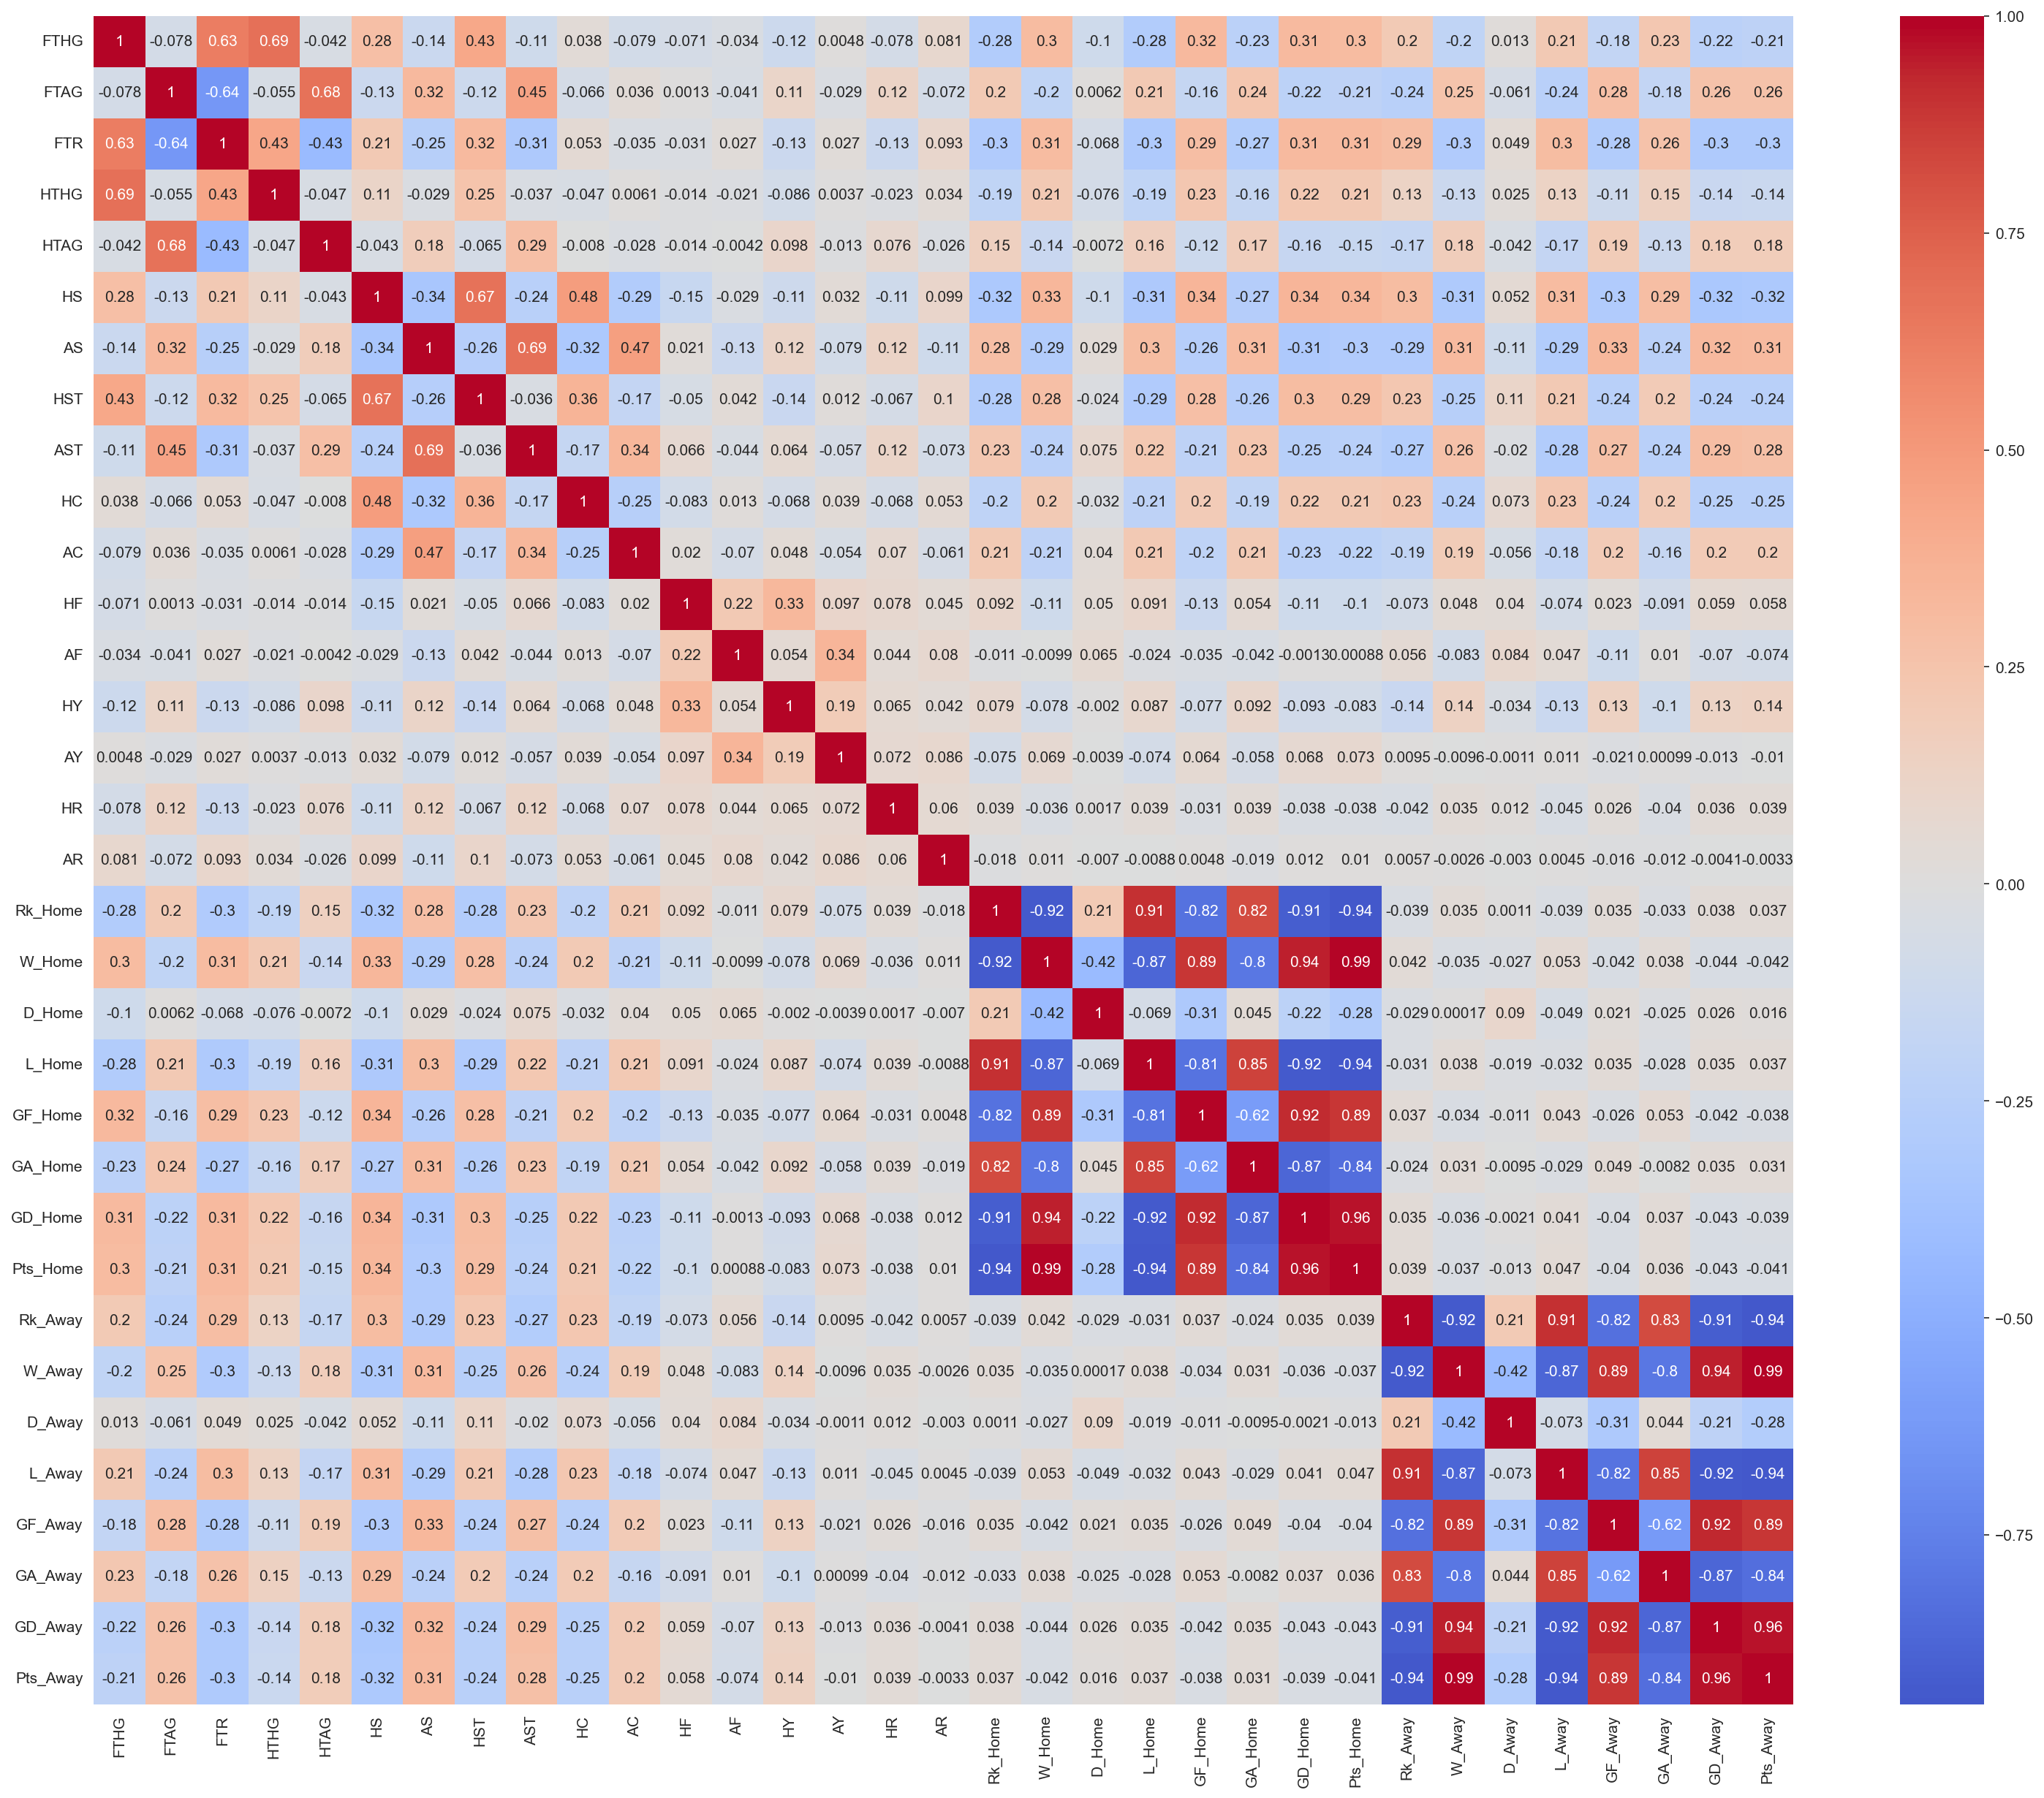

In [82]:
plt.figure(figsize=(25, 20), dpi=150)
drop_cols = ['Date', 'HomeTeam', 'AwayTeam', 'Year', 'Team_Home', 'Team_Away', 'Referee', 'HTR']
df_original['FTR'] = df_original['FTR'].map({'H': 1, 'D': 0, 'A': -1})
df_original = df_original.drop(drop_cols, axis=1).dropna()
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [75]:
df_original

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,...,Pts_Home,Rk_Away,MP_Away,W_Away,D_Away,L_Away,GF_Away,GA_Away,GD_Away,Pts_Away
1,4.0,2.0,1,1.0,0.0,H,17.0,12.0,10.0,5.0,...,65.0,9.0,38.0,15.0,10.0,13.0,52.0,53.0,-1.0,55.0
2,1.0,3.0,-1,1.0,1.0,D,6.0,16.0,3.0,9.0,...,44.0,12.0,38.0,14.0,10.0,14.0,46.0,52.0,-6.0,52.0
3,2.0,2.0,0,1.0,2.0,A,6.0,13.0,4.0,6.0,...,38.0,15.0,38.0,12.0,8.0,18.0,45.0,62.0,-17.0,44.0
4,2.0,0.0,1,2.0,0.0,H,17.0,12.0,8.0,6.0,...,69.0,13.0,38.0,12.0,14.0,12.0,59.0,49.0,10.0,50.0
5,0.0,0.0,0,0.0,0.0,D,5.0,5.0,4.0,3.0,...,55.0,6.0,38.0,15.0,13.0,10.0,46.0,35.0,11.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8834,2.0,2.0,0,1.0,2.0,A,11.0,13.0,6.0,5.0,...,41.0,4.0,38.0,19.0,14.0,5.0,68.0,33.0,35.0,71.0
8835,0.0,1.0,-1,0.0,0.0,D,12.0,10.0,2.0,4.0,...,40.0,17.0,38.0,8.0,12.0,18.0,34.0,57.0,-23.0,36.0
8837,1.0,1.0,0,1.0,0.0,H,18.0,10.0,7.0,5.0,...,62.0,10.0,38.0,15.0,7.0,16.0,55.0,53.0,2.0,52.0
8838,3.0,0.0,1,2.0,0.0,H,21.0,9.0,8.0,1.0,...,67.0,16.0,38.0,9.0,11.0,18.0,38.0,68.0,-30.0,38.0
